In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from altaipony.ffd import FFD

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())

for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 13

paperdir="/home/ekaterina/Documents/002_writing/flares-in-clusters-ii-draft/Flares_in_Clusters_with_K2_2/"

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

211931651, 211970427 (x2) stars with both LC and SC

In [3]:
EPIC = 211970427

In [4]:
df = pd.read_csv("../k2scoc/results/tables/2020_05_final_flares.csv")
dfsc =pd.read_csv("../k2scoc/results/tables/SC_flares.csv")

In [5]:
sdf = df[(df.EPIC==EPIC) & (df.real==1)]
sdfsc = dfsc[(dfsc.EPIC==EPIC)]

In [33]:
sdfsc.sort_values(by="ed_rec").head(20)

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dtp_tot,C,EPIC,i,Unnamed: 13
172,779,782,4913180,4913183,3463.248072,3463.250115,1.348815,0.187110,0.008444,2020,18,211970427,32,NaN
155,584,587,4892824,4892827,3449.384506,3449.386550,1.420156,0.184604,0.008569,2020,18,211970427,22,NaN
33,997,1000,3238263,3238266,2322.430820,2322.432863,1.453579,0.164130,0.012645,2020,5,211970427,11,NaN
75,1794,1797,3273343,3273346,2346.322289,2346.324332,1.512076,0.181252,0.008702,2020,5,211970427,28,NaN
177,552,555,4921038,4921041,3468.599798,3468.601841,1.532725,0.180600,0.012548,1691,18,211970427,36,NaN
117,1648,1651,4855207,4855210,3423.764967,3423.767010,1.533508,0.177324,0.011347,2020,18,211970427,3,NaN
109,108,111,3324236,3324239,2380.983333,2380.985376,1.566075,0.190028,0.011258,725,5,211970427,54,NaN
94,897,900,3304891,3304894,2367.808225,2367.810268,1.582007,0.175204,0.013624,2020,5,211970427,44,NaN
126,1372,1375,4865096,4865099,3430.500049,3430.502092,1.588513,0.176204,0.012322,2020,18,211970427,8,NaN
40,230,233,3249578,3249581,2330.137002,2330.139045,1.661394,0.172938,0.011685,2020,5,211970427,17,NaN


In [54]:
sdfsc[(sdfsc.ed_rec < 2.)].shape[0] / sdfsc[(sdfsc.ed_rec > 2.)].shape[0], sdf[(sdf.ed_rec < 50.)].shape[0] / sdf[(sdf.ed_rec > 50.)].shape[0]

(0.14685314685314685, 0.14285714285714285)

In [6]:
tobs_sdf = sdf.dtp_tot.unique().sum() / 2. / 24 / 365.25
tobs_sdf_dict = {211931651:73658,
            211970427: 73665+108595} #total data points in 1min cadence
tobs_sdfsc = tobs_sdf_dict[EPIC] / 60 / 24 / 365.25

In [7]:
tobs_sdf, tobs_sdfsc

(0.5396988364134154, 0.34652825309909496)

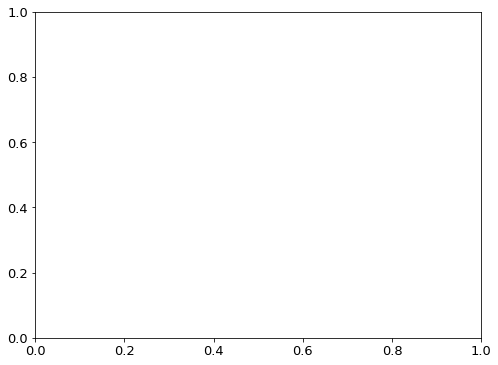

In [9]:
fig, ax =  plt.subplots(1, figsize=(8,6))

In [43]:
# Long cadence
ffd1 = FFD(f=sdf[sdf.ed_rec>50.], tot_obs_time=tobs_sdf, ID="EPIC")

ed, freq, counts = ffd1.ed_and_freq(energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)


ax.scatter(ed, freq, c="k",alpha=0.7, marker="d", label=f"EPIC {EPIC} long cadence")

BFA1 = ffd1.fit_powerlaw("mcmc")
a1, ea1up, ea1low = ffd1.alpha, ffd1.alpha_up_err, ffd1.alpha_low_err
b1, eb1up, eb1low = ffd1.beta, ffd1.beta_up_err, ffd1.beta_low_err
# ffd.plot_powerlaw(ax=ax, c="k")

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/emcee/moves/red_blue.py:97: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/wheatland.py:313: RuntimeWarning: invalid value encountered in log
  f2 = M * np.log(alpha - 1)
100%|██████████| 500/500 [00:05<00:00, 96.12it/s]


100%|██████████| 500/500 [00:06<00:00, 79.66it/s]


Text(0, 0.5, 'cumulative number of flares [yr$^{-1}$]')

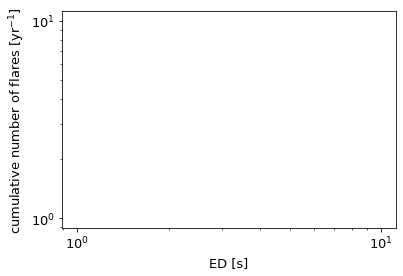

In [35]:
# Short cadence
ffd2 = FFD(f=sdfsc[sdfsc.ed_rec>2.], tot_obs_time=tobs_sdfsc, ID="EPIC")

ed, freq, counts = ffd2.ed_and_freq(energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.scatter(ed, freq, c="r", marker="*", label= f"EPIC {EPIC} short cadence")

BFA2 = ffd2.fit_powerlaw("mcmc")
a2, ea2up, ea2low = ffd2.alpha, ffd2.alpha_up_err, ffd2.alpha_low_err
b2, eb2up, eb2low = ffd2.beta, ffd2.beta_up_err, ffd2.beta_low_err
ffd.plot_powerlaw(ax=ax, c="k")

#ffd.alpha_prior = 2.
# ffd.beta_prior=800

# BFA = ffd.fit_mcmc_powerlaw(steps=200, loglikelihood=loglikelihood_gauss_wheatland_ed)
# print(f"Fitted power law alpha={ffd.alpha}({ffd.alpha_up_err}/{ffd.alpha_low_err})")
# print(f"Fitted power law beta={ffd.beta}({ffd.beta_up_err}/{ffd.beta_low_err})")

# ispowerlaw = ffd.is_powerlaw()
# truncated = ffd.is_powerlaw_truncated()

# ffd.plot_mcmc_powerlaw(ax, BFA, subset=50, linewidth=5, c="tomato", alpha=.005, zorder=-1)
# ax.scatter(ffd.ed, ffd.freq, marker="*", c="dimgrey", )#label="all flaring stars contribute = above detection threshold")
# a, x, y = ffd.plot_powerlaw(ax, c="r", 
#                             label=(fr"$\alpha=${ffd.alpha:.2f}, "
#                                    fr"$\beta=${int(np.rint(ffd.beta))}" + r" yr$^{-1}$"))

plt.xscale("log")
plt.yscale("log")
plt.legend(frameon=False)
plt.xlabel("ED [s]")
plt.ylabel(r"cumulative number of flares [yr$^{-1}$]")


# plt.savefig(f"plots/{tstamp}_full_sample_ffd_ED_wheatland.png", dpi=300)
# plt.savefig(f"{paperdir}pics/FFDs/full_sample_ffd_ED_wheatland.png", dpi=300)

# plt.savefig(f"plots/{tstamp}_EPIC{EPIC}_long_vs_short_cadence_ffd.png", dpi=300)
# plt.savefig(f"{paperdir}pics/FFDs/EPIC{EPIC}_long_vs_short_cadence_ffd.png", dpi=300)

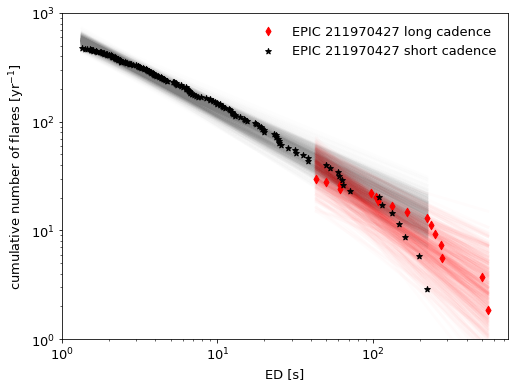

In [72]:
fig, ax =  plt.subplots(1, figsize=(8,6))

inds = np.random.randint(len(BFA2.samples), size=500)
for ind in inds:
    beta,alpha = BFA2.samples[ind]
    ffd = FFD(alpha=alpha, beta=beta)
    ffd.ed = np.linspace(sdfsc.ed_rec.min(),sdfsc.ed_rec.max(),4)
    ffd.plot_powerlaw(ax=ax, c="grey", alpha=.01, linewidth=3,zorder=-10)
    
    


inds = np.random.randint(len(BFA1.samples), size=500)
for ind in inds:
    beta,alpha = BFA1.samples[ind]
    ffd = FFD(alpha=alpha, beta=beta)
    ffd.ed = np.linspace(sdf.ed_rec.min(),sdf.ed_rec.max(),4)
    ffd.plot_powerlaw(ax=ax, c="r", alpha=.01, linewidth=3,zorder=-10)
    
    
ffd = FFD(f=sdf, tot_obs_time=tobs_sdf, ID="EPIC")

ed, freq, counts = ffd.ed_and_freq(energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.scatter(ed, freq, c="r", marker="d", label= f"EPIC {EPIC} long cadence")

ffd = FFD(f=sdfsc, tot_obs_time=tobs_sdfsc, ID="EPIC")

ed, freq, counts = ffd.ed_and_freq(energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.scatter(ed, freq, c="k", marker="*", label= f"EPIC {EPIC} short cadence")

ax.set_yscale("log")
ax.set_xscale("log")

plt.legend(frameon=False)
plt.xlabel("ED [s]")
plt.ylabel(r"cumulative number of flares [yr$^{-1}$]")
plt.ylim(1,1e3)

plt.savefig(f"plots/{tstamp}_full_sample_ffd_ED_wheatland.png", dpi=300)
plt.savefig(f"{paperdir}pics/FFDs/full_sample_ffd_ED_wheatland.png", dpi=300)

plt.savefig(f"plots/{tstamp}_EPIC{EPIC}_long_vs_short_cadence_ffd.png", dpi=300)
plt.savefig(f"{paperdir}pics/FFDs/EPIC{EPIC}_long_vs_short_cadence_ffd.png", dpi=300)

In [61]:
a2, ea2up, ea2low, b2, eb2up, eb2low

(1.7274139809322437,
 0.06231207837537278,
 0.058644033349593894,
 500.7361603991305,
 80.8792747648161,
 70.17195872238779)

In [62]:
a1, ea1up, ea1low, b1, eb1up, eb1low

(1.9915420929012821,
 0.27855402030391474,
 0.234279493615823,
 1573.7465744832427,
 4946.6302135710985,
 1126.451744552741)

In [ ]:
sdf.sort_values(by="ed_rec", ascending=True).C.unique()

In [ ]:
sdfsc.sort_values(by="ed_rec", ascending=False).head(4)

In [ ]:
plt.scatter(sdf[sdf.C==18].tstart, sdf[sdf.C==18].ed_rec, c="k")
plt.scatter(sdfsc.tstart, sdfsc.ed_rec)

In [ ]:
from altaipony.wheatland import calculate_joint_posterior_distribution, gaussian_prior

def loglikelihood_gauss_wheatland_ed(theta, *args):
    '''Log likelihood to pass to BayesianFlaringAnalysis
    for fitting the powerlaw following Wheatland 2004.
    Using a gaussian prior for alpha.
    '''
    mu = float(open(f"{paperdir}values/gauss_wheatland_alpha_mu.txt", "r").read())
    sigma = float(open(f"{paperdir}values/gauss_wheatland_alpha_sigma.txt", "r").read())
    
    def prior(x):
        return gaussian_prior(x, mu, sigma)
    return calculate_joint_posterior_distribution(theta, *args, prior)

In [ ]:
from altaipony.lcio import from_mast, from_path

In [ ]:
flc1 = from_mast("EPIC 211931651", c=13, mission="K2", mode="LC" ,cadence="long")

In [ ]:
flc1.plot()
#plt.ylim(110000,120000)

In [ ]:
len(flc1.flux)/3000

In [ ]:
flc1d = flc1.detrend("savgol")

In [ ]:
plt.plot(flc1d.time, flc1d.detrended_flux)
plt.plot(flc1d.time, flc1d.flux)
#plt.ylim(2700,4000)
plt.xlim(2250,2255)

In [ ]:
flares = flc1d.find_flares().flares

In [ ]:
flc = corr_lc
for i, r in flares2.iterrows():
    plt.figure(figsize=(7,5))
    plt.plot(flc.time, flc.detrended_flux,c="k")
    plt.plot(flc.time, flc.flux,c="b", alpha=.3)
    sta, sto = int(r.istart), int(r.istop)+1
    plt.scatter(flc.time[sta:sto], flc.flux[sta:sto], c="r", label=r.cstart)#, label=f"EPIC {EPIC}, C{C}")#
    plt.xlim(r.tstart-.2,r.tstop+.2)
    plt.ylim(.9,1.1)
    plt.legend()
   # plt.savefig(f"plots/EPIC_{EPIC}_C{C}_{r.istart}_multiperiod.png",dpi=300)
    #print(r.istart)

In [ ]:

# Remove nans and outliers
lc = flc1.remove_nans().remove_outliers()

# Remove long term trends
lc = lc.flatten(window_length=401)



In [ ]:
corr_lc = lc.to_corrector("sff").correct(windows=10)

In [ ]:
corr_lcd = corr_lc.detrend("savgol")
flares2 = corr_lcd.find_flares().flares

In [ ]:
flck2sc = from_path(f"../k2scoc/pony_k2sc_k2_llc_{ID}-c13_kepler_v2_lc.fits", mode="AltaiPony", mission="K2")

In [ ]:
for x in range(0,80,4):
    plt.figure(figsize=(10,4))
    plt.plot(flck2sc.time, flck2sc.detrended_flux)
    plt.plot(corr_lc.time, corr_lc.flux*4e5)
    plt.plot(corr_lcd.time, corr_lcd.detrended_flux*4e5)
    #plt.plot(flc1d.time, flc1d.detrended_flux, label="detrended savgol")
    #plt.plot(flc1d.time, flc1d.flux)

    #plt.ylim(11100,12700)
    plt.xlim(2980+x,2984+x)

In [ ]:
ra = pd.read_csv("tables/raetz2020.tsv", delimiter="\t", skiprows=82)

In [ ]:
ras = set(ra.EPIC.values)

In [ ]:
dfs = set(df.loc[df.todrop.isnull(),"EPIC"].values)

In [ ]:
ras.intersection(dfs)

In [ ]:
ID = 210651981

ra.loc[ra.EPIC==ID, "Nflares(LC)"].values, df[(df.real==1) &(df.EPIC==ID) & (df.todrop.isnull())].shape[0], df[(df.EPIC==ID) & (df.todrop.isnull())].shape[0] 

In [ ]:
210317378, 6, 